# Loading Packages

In [1]:
# !pip3 install torch==1.9.1+cu102 torchvision==0.10.1+cu102 torchaudio===0.9.1 -f https://download.pytorch.org/whl/torch_stable.html
# !pip install imblearn

# For visualizing the model
# !pip install graphviz
# !pip install torchviz
# !pip install torchsummary

In [2]:
# Basic Python Packages
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Torch Packages
import torch
import torchvision
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import init
from torchviz import make_dot
from torchsummary import summary

# ML Test and Validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Other
import cv2
from tqdm import tqdm
from copy import deepcopy
from random import *
import graphviz

# Our functions
from processing_functions_2 import *

# Formatting
pd.set_option('max_colwidth', 1000)

# Making the Data

## Make the Segmented Teeth

In [3]:
# # Run this cell once

# # Global vars for loading data
# output_path = 'C:/Documents/Dental_Detection/Segmented_Images_7/'

# # Path
# xray_path = 'D:/dental_training_images/images/'
# anomaly_path = 'D:/dental_training_images/labels/'
# segmentation_path = 'D:/dental_training_images/segments/'

# # Make the data
# make_data(xray_path=xray_path, anomaly_path=anomaly_path, segmentation_path=segmentation_path, output_path=output_path)

## Make the Clahe Images

In [4]:
# # Make clahe train
# # Do once

# # paths and train df
# output_path = 'C:/Documents/Dental_Detection/Segmented_Images_7_clahe/'
# train_df = pd.read_csv('C:/Documents/Dental_Detection/data_csv/train_data_pano0_6.csv')

# # make the clahe images
# make_clahe(train_df=train_df, output_path=output_path)

In [5]:
# # Make clahe valid
# # Do once

# # paths and valid df
# output_path = 'C:/Documents/Dental_Detection/Segmented_Images_7_clahe/'
# valid_df = pd.read_csv('C:/Documents/Dental_Detection/data_csv/valid_data_pano0_6.csv')

# # make the clahe images
# make_clahe(df=valid_df, output_path=output_path)

## Make the Augmented Images

In [6]:
# # Make augmentations
# # Do once
# which_anomaly = [1, 2, 3, 4, 5, 6, 8]
# train_path = 'C:/Documents/Dental_Detection/Segmented_Images_7_aug/'
# make_augments('C:/Documents/Dental_Detection/data_csv/train_clahe_data_pano0_6.csv', train_path=train_path, which_anomaly=which_anomaly,
#               add_rotation=True, add_flip=True, add_noise=True, add_blur=True)

In [7]:
# # Make clahe augmentations
# # Do once
# which_anomaly = [1, 2, 3, 4, 5, 6, 8]
# train_path = 'C:/Documents/Dental_Detection/Segmented_Images_7_aug_clahe/'
# make_augments('C:/Documents/Dental_Detection/data_csv/train_clahe_data_pano0_6.csv', train_path=train_path, which_anomaly=which_anomaly,
#               add_rotation=True, add_flip=True, add_noise=True, add_blur=True)

# EDA

In [8]:
train_df = pd.read_csv('C:/Documents/Dental_Detection/data_csv/train_data_final.csv')
valid_df = pd.read_csv('C:/Documents/Dental_Detection/data_csv/valid_clahe_data_pano0_6.csv')
train_aug_df = pd.read_csv('C:/Documents/Dental_Detection/data_csv/train_data_aug_clahe_final.csv')
train_aug_df = filter_rotation(train_aug_df, [[0, 5], [175, 185], [355, 360]])

In [9]:
train_aug_df.head()

,Unnamed: 0,file_path,anomaly_codes,is_rotated,is_flipped,is_noise,is_blur,in_rotation_angle
0,0,C:/Documents/Dental_Detection/Segmented_Images_Clahe_Final\cate2-00001_7_clahe.png,7.0,0,0,0,0,0
1,1,C:/Documents/Dental_Detection/Segmented_Images_Clahe_Final\cate2-00117_22_clahe.png,7.0,0,0,0,0,0
2,2,C:/Documents/Dental_Detection/Segmented_Images_Clahe_Final\cate2-00198_6_clahe.png,7.0,0,0,0,0,0
3,3,C:/Documents/Dental_Detection/Segmented_Images_Clahe_Final\1.2.840.114257.3.6.11535701136057740458562134591930547309956_5_clahe.png,0.0,0,0,0,0,0
4,4,C:/Documents/Dental_Detection/Segmented_Images_Clahe_Final\cate2-00151_30_clahe.png,7.0,0,0,0,0,0


In [10]:
train_df.groupby('anomaly_codes').count()

,Unnamed: 0,Unnamed: 0.1,file_path
anomaly_codes,,,
0.0,1316,1316,1316
1.0,184,184,184
2.0,26,26,26
3.0,13,13,13
4.0,43,43,43
5.0,45,45,45
6.0,74,74,74
7.0,9033,9033,9033
8.0,155,155,155


Text(0, 0.5, 'count')

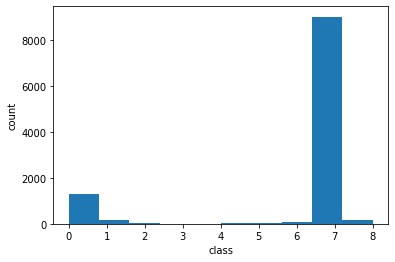

In [11]:
plt.hist(train_df['anomaly_codes'])
plt.xlabel('class')
plt.ylabel('count')

In [12]:
valid_df.groupby('anomaly_codes').count()

,Unnamed: 0,file_path
anomaly_codes,,
0.0,344,344
1.0,51,51
2.0,8,8
3.0,3,3
4.0,14,14
5.0,15,15
6.0,27,27
7.0,2258,2258
8.0,39,39


Text(0, 0.5, 'count')

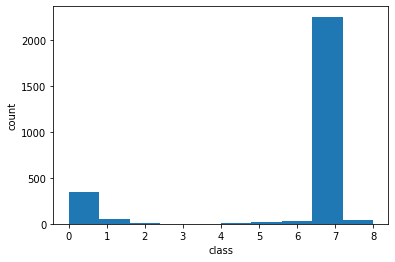

In [13]:
plt.hist(valid_df['anomaly_codes'])
plt.xlabel('class')
plt.ylabel('count')

In [14]:
train_aug_df.groupby('anomaly_codes').count()

,Unnamed: 0,file_path,is_rotated,is_flipped,is_noise,is_blur,in_rotation_angle
anomaly_codes,,,,,,,
0.0,1316,1316,1316,1316,1316,1316,1316
1.0,1840,1840,1840,1840,1840,1840,1840
2.0,260,260,260,260,260,260,260
3.0,130,130,130,130,130,130,130
4.0,430,430,430,430,430,430,430
5.0,450,450,450,450,450,450,450
6.0,740,740,740,740,740,740,740
7.0,9033,9033,9033,9033,9033,9033,9033
8.0,155,155,155,155,155,155,155


In [15]:
np.random.seed(10)

train_aug_df = train_aug_df.drop(train_aug_df[train_aug_df['anomaly_codes'] == 7].sample(frac=.5).index)

In [16]:
train_aug_df.groupby('anomaly_codes').count()

,Unnamed: 0,file_path,is_rotated,is_flipped,is_noise,is_blur,in_rotation_angle
anomaly_codes,,,,,,,
0.0,1316,1316,1316,1316,1316,1316,1316
1.0,1840,1840,1840,1840,1840,1840,1840
2.0,260,260,260,260,260,260,260
3.0,130,130,130,130,130,130,130
4.0,430,430,430,430,430,430,430
5.0,450,450,450,450,450,450,450
6.0,740,740,740,740,740,740,740
7.0,4517,4517,4517,4517,4517,4517,4517
8.0,155,155,155,155,155,155,155


Text(0, 0.5, 'count')

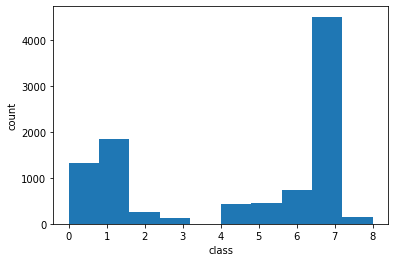

In [17]:
plt.hist(train_aug_df['anomaly_codes'])
plt.xlabel('class')
plt.ylabel('count')

# Class Definitions

## _TeethDataLoader_

In [18]:
class TeethDataLoader(data.Dataset):
    
    def __init__(self, path_to_df, anomalies_to_include, check_augments, augments_to_include):
        """
        path_to_df: the path to the main data frame ex. ~/Documents/Dental/segmented_data.csv
        anomalies_to_include: list of anomlies based on code ex. [0, 1, 2, 3, 4, 5, 6, 7, 8]
        augments_to_include: list of augment bools to include as list of 1s and Os 
                             ex. [1, 1, 1, 1] == [rotation, flip, noise, blur]
                             ex. [1, 1, 0, 0] == [rotation, flip, no noise, no blur]
        """
        # Read in data
        df = pd.read_csv(path_to_df)
        
        # Filter out which anomalies
        df = df[df['anomaly_codes'].isin(anomalies_to_include)]
#         df = df.drop(df[df['anomaly_codes'] == 7].sample(frac=.5).index)
        
        if check_augments:
            # Filter out which augmentations to include
            include_rotations = augments_to_include[0]
            include_flips = augments_to_include[1]
            include_noise = augments_to_include[2]
            include_blur = augments_to_include[3]

            if(include_rotations == 0):
                df = df[df['is_rotated'] == 0]
            else:
                df = filter_rotation(df, [[0, 5], [175, 185], [355, 360]])
            if(include_flips == 0):
                df = df[df['is_flipped'] == 0]
            if(include_noise == 0):
                df = df[df['is_noise'] == 0]
            if(include_blur == 0):
                df = df[df['is_blur'] == 0]

        self.images, self.labels = df['file_path'].tolist(), df['anomaly_codes'].tolist()
        
        
    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        img = cv2.imread(self.images[index])     # loads image from file
        img = cv2.resize(img, (224, 224))        # resize image to 224x224
        
        # clahe
#         clahe = cv2.createCLAHE(clipLimit=12.0, tileGridSize=(8,8))
#         img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         img2 = clahe.apply(img1)
#         img = cv2.hconcat([img1,img2])
        
        # more processing
        img = np.array(img, dtype=np.float32)    # change data type to float
        img = (img / 255.)                       # normalize colors to be 0-1
        img = img[:, :, (2, 1, 0)]               # reorder RGB
        img = torchvision.transforms.ToTensor()(img)  # convert to tensor
        label = self.labels[index]               # Make label
        
        return img.float(), torch.FloatTensor([label]) # returns tensor of modified image and label

## Defining the Model Classes and Layers

In [19]:
class BasicConv(nn.Module):
    # initialize class
    def __init__(self, in_planes, out_planes, kernel_size, stride=1, 
                 padding=0, dilation=1, groups=1, relu=True, bn=True, bias=False):
        super(BasicConv, self).__init__()
        self.out_channels = out_planes
        # def conv layer, in_planes/out_planes = size of features
        self.conv = nn.Conv2d(in_planes, out_planes, 
                              kernel_size=kernel_size, stride=stride, 
                              padding=padding, dilation=dilation,
                              groups=groups, bias=bias)
        # batch normalization - normalization of the layers' inputs by re-centering and re-scaling
        self.bn = nn.BatchNorm2d(out_planes,eps=1e-5, momentum=0.01, affine=True) if bn else None
        # ReLu activation
        self.relu = nn.ReLU() if relu else None

    # create feed-forward network for conv layer
    def forward(self, x):
        x = self.conv(x)           # only 1 layer
        if self.bn is not None:
            x = self.bn(x)
        if self.relu is not None:
            x = self.relu(x)
        return x
 
    
class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.size(0), -1) # reshape to flatten tensor which is necessary in order to pass data into a linear layer
                                     # add -1
                                     # no flatten function in pytorch so need to create it

            
class ChannelGate(nn.Module):
    def __init__(self, gate_channels, reduction_ratio=16, pool_types=['avg', 'max']):
        super(ChannelGate, self).__init__()
        self.gate_channels = gate_channels
        self.mlp = nn.Sequential(
            Flatten(),
            nn.Linear(gate_channels, gate_channels // reduction_ratio),
            nn.ReLU(),
            nn.Linear(gate_channels // reduction_ratio, gate_channels)
            )
        self.pool_types = pool_types
        
    def forward(self, x):
        channel_att_sum = None
        for pool_type in self.pool_types:
            if pool_type=='avg':
                avg_pool = F.avg_pool2d( x, (x.size(2), x.size(3)), stride=(x.size(2), x.size(3)))
                channel_att_raw = self.mlp( avg_pool )
            elif pool_type=='max':
                max_pool = F.max_pool2d( x, (x.size(2), x.size(3)), stride=(x.size(2), x.size(3)))
                channel_att_raw = self.mlp( max_pool )
            elif pool_type=='lp':
                lp_pool = F.lp_pool2d( x, 2, (x.size(2), x.size(3)), stride=(x.size(2), x.size(3)))
                channel_att_raw = self.mlp( lp_pool )
            elif pool_type=='lse':
                # LSE pool only
                lse_pool = logsumexp_2d(x)
                channel_att_raw = self.mlp( lse_pool )

            if channel_att_sum is None:
                channel_att_sum = channel_att_raw
            else:
                channel_att_sum = channel_att_sum + channel_att_raw

        scale = F.sigmoid( channel_att_sum ).unsqueeze(2).unsqueeze(3).expand_as(x)
        return x * scale

    
def logsumexp_2d(tensor):
    tensor_flatten = tensor.view(tensor.size(0), tensor.size(1), -1)
    s, _ = torch.max(tensor_flatten, dim=2, keepdim=True)
    outputs = s + (tensor_flatten - s).exp().sum(dim=2, keepdim=True).log()
    return outputs


class ChannelPool(nn.Module):
    def forward(self, x):
        return torch.cat( (torch.max(x,1)[0].unsqueeze(1), torch.mean(x,1).unsqueeze(1)), dim=1 )

       
class SpatialGate(nn.Module):
    def __init__(self):
        super(SpatialGate, self).__init__()
        kernel_size = 7
        self.compress = ChannelPool()
        self.spatial = BasicConv(2, 1, kernel_size, stride=1, padding=(kernel_size-1) // 2, relu=False)
    def forward(self, x):
        x_compress = self.compress(x)
        x_out = self.spatial(x_compress)
        scale = F.sigmoid(x_out) # broadcasting
        return x * scale

       
class CBAM(nn.Module):
    def __init__(self, gate_channels, reduction_ratio=16, pool_types=['avg', 'max'], no_spatial=False):
        super(CBAM, self).__init__()
        self.ChannelGate = ChannelGate(gate_channels, reduction_ratio, pool_types)
        self.no_spatial=no_spatial
        if not no_spatial:
            self.SpatialGate = SpatialGate()
            
    def forward(self, x):
        x_out = self.ChannelGate(x)
        if not self.no_spatial:
            x_out = self.SpatialGate(x_out)
        return x_out

In [20]:
def conv3x3(in_planes, out_planes, stride=1):
    "3x3 convolution with padding"
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, use_cbam=False):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

        if use_cbam:
            self.cbam = CBAM( planes, 16 )
        else:
            self.cbam = None

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        if not self.cbam is None:
            out = self.cbam(out)

        out += residual
        out = self.relu(out)

        return out

class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, use_cbam=False):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                               padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * 4, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * 4)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

        if use_cbam:
            self.cbam = CBAM( planes * 4, 16 )
        else:
            self.cbam = None

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        if not self.cbam is None:
            out = self.cbam(out)

        out += residual
        out = self.relu(out)

        return out

class ResNet(nn.Module):
    def __init__(self, block, layers,  network_type, num_classes, att_type=None):
        self.inplanes = 64
        super(ResNet, self).__init__()

        self.network_type = network_type
        # different model config between ImageNet and CIFAR 
        if network_type == "ImageNet":
            self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
            self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
            self.avgpool = nn.AvgPool2d(7)
        else:
            self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)

        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)

        if att_type=='BAM':
            self.bam1 = BAM(64*block.expansion)
            self.bam2 = BAM(128*block.expansion)
            self.bam3 = BAM(256*block.expansion)
        else:
            self.bam1, self.bam2, self.bam3 = None, None, None

        self.layer1 = self._make_layer(block, 64,  layers[0], att_type=att_type)
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2, att_type=att_type)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2, att_type=att_type)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2, att_type=att_type)

        self.fc = nn.Linear(512 * block.expansion, num_classes)
        #self.fc = nn.Linear(512 * block.expansion, 1) # linear is output of probability distributions
        self.softmax = torch.nn.Sigmoid()
        init.kaiming_normal(self.fc.weight)
        for key in self.state_dict():
            if key.split('.')[-1]=="weight":
                if "conv" in key:
                    init.kaiming_normal(self.state_dict()[key], mode='fan_out')
                if "bn" in key:
                    if "SpatialGate" in key:
                        self.state_dict()[key][...] = 0
                    else:
                        self.state_dict()[key][...] = 1
            elif key.split(".")[-1]=='bias':
                self.state_dict()[key][...] = 0

    def _make_layer(self, block, planes, blocks, stride=1, att_type=None):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, use_cbam=att_type=='CBAM'))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes, use_cbam=att_type=='CBAM'))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        if self.network_type == "ImageNet":
            x = self.maxpool(x)

        x = self.layer1(x)
        if not self.bam1 is None:
            x = self.bam1(x)

        x = self.layer2(x)
        if not self.bam2 is None:
            x = self.bam2(x)

        x = self.layer3(x)
        if not self.bam3 is None:
            x = self.bam3(x)

        x = self.layer4(x)

        if self.network_type == "ImageNet":
            x = self.avgpool(x)
        else:
            x = F.avg_pool2d(x, 4)
            
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        #return F.normalize(x, dim=-1)
        return self.softmax(x)
    
def ResidualNet(network_type, depth, num_classes, att_type):

    assert network_type in ["ImageNet", "CIFAR10", "CIFAR100"], "network type should be ImageNet or CIFAR10 / CIFAR100"
    assert depth in [5, 18, 34, 50, 101], 'network depth should be 18, 34, 50 or 101'

    if depth == 18:
        model = ResNet(BasicBlock, [2, 2, 2, 2], network_type, num_classes, att_type)
        
    elif depth == 5:
        model = ResNet(BasicBlock, [1, 1, 2, 1], network_type, num_classes, att_type)

    elif depth == 34:
        model = ResNet(BasicBlock, [3, 4, 6, 3], network_type, num_classes, att_type)

    elif depth == 50:
        model = ResNet(Bottleneck, [3, 4, 6, 3], network_type, num_classes, att_type)

    elif depth == 101:
        model = ResNet(Bottleneck, [3, 4, 23, 3], network_type, num_classes, att_type)

    return model

## Define Train and Valid Functions

In [21]:
best_accuracy = 0

def train(train_loader, model, classes, optimizer, epoch):
    model.train()
    running_mse = 0
    batch_idx = 0
    correct, total = 0, 0
    confusion_matrix = torch.zeros(classes, classes)
    pd, gt = [], []
    for (x, y) in tqdm(train_loader):
        batch_idx += 1
        x = x.to(device) # move data to GPU
        y = y.to(device) # move data to GPU

        out = model(x)
        criterion = nn.CrossEntropyLoss()
        #criterion = nn.BCELoss()                    # binary cross entropy loss
        loss = criterion(out, y.squeeze(1).long())
        #loss = criterion(out.squeeze(1), y.squeeze(1)) # calculate loss based on pred output vs actuals y, 
                                                       # .squeeze removes dimensions of 1
        running_mse += loss.item() 
        optimizer.zero_grad()        # start gradient at 0
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(out.data, 1)
        #predicted = (out.data > 0.5).int()

        for p in predicted:
            pd.append(p)
        for g in y.squeeze(1):
            gt.append(g)

        total += y.squeeze(1).size(0)
        correct += (predicted == y.squeeze(1)).sum().item()
        for t, p in zip(y.squeeze(1).view(-1), predicted.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    
    pd = torch.as_tensor(pd).numpy()
    gt = torch.as_tensor(gt).numpy()

    running_mse = running_mse / batch_idx
    print('Epoch %d, loss = %.4f, batch_idx= %d' % (epoch, running_mse, batch_idx))
    print('Epoch: %d Accuracy of the Train Images: %f' %(epoch, 100 * correct / total))
    print('Confusion Matrix\n', np.round(confusion_matrix.cpu().numpy(), 2))
    print('Classification Report\n', classification_report(gt, pd))
    return running_mse, 100*correct/total
    

def valid(valid_loader, model, classes, epoch):
    global best_accuracy
    model.eval()
    correct, total = 0, 0
    running_mse = 0
    batch_idx = 0
    confusion_matrix = torch.zeros(classes, classes)
    pd, gt = [], []
    with torch.no_grad():
        for x, y in tqdm(valid_loader):
            batch_idx += 1
            x = x.to(device)
            y = y.to(device)

            out = model(x) # add .to(device) ???
            criterion = nn.CrossEntropyLoss()
            #criterion = nn.BCELoss()
            loss = criterion(out, y.squeeze(1).long())
            #loss = criterion(out.squeeze(1), y.squeeze(1))
            running_mse += loss.item()
            _, predicted = torch.max(out.data, 1)
            #predicted = (out.data > 0.5).int()

            for p in predicted:
                pd.append(p)
            for g in y.squeeze(1):
                gt.append(g)

            total += y.squeeze(1).size(0)
            correct += (predicted == y.squeeze(1)).sum().item()
            for t, p in zip(y.squeeze(1).view(-1), predicted.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

    if best_accuracy < 100 * (correct/total):
        best_accuracy = 100 * (correct/total)
        
    pd = torch.as_tensor(pd).numpy()
    gt = torch.as_tensor(gt).numpy()
    
    running_mse = running_mse / batch_idx
    print('Epoch: %d Accuracy of the Valid Images: %f' %(epoch, 100 * correct / total))
    print('Confusion Matrix\n', np.round(confusion_matrix.cpu().numpy(), 2))
    print('Classification Report\n', classification_report(gt, pd))
    return running_mse, 100*correct/total

# GPU

In [22]:
# check if GPU available and assign it
torch.cuda.is_available()
device = torch.device('cuda', 1)
# device = torch.device('cpu') # this switches to CPU for debugging
device

device(type='cuda', index=1)

# Making and Running the Models

In [23]:
# Global Variables for the Models
train_path_to_df = 'C:/Documents/Dental_Detection/data_csv/train_aug_data_final.csv'
valid_path_to_df = 'C:/Documents/Dental_Detection/data_csv/valid_data_pano0_6.csv'
train_clahe_path_to_df = 'C:/Documents/Dental_Detection/data_csv/train_data_aug_clahe_final.csv'
valid_clahe_path_to_df = 'C:/Documents/Dental_Detection/data_csv/valid_clahe_data_pano0_6.csv'
batch_size = 64
epochs = 30

anomalies_to_include_1 = [0, 1, 2, 3, 4, 5, 6, 7]

## _Model 1_

In [24]:
# # anomalies_to_include_1 = [0, 1, 2, 3, 4, 5, 6, 7]
# augments_to_include_1 = [0, 0, 0, 0]

# num_classes_1 = len(anomalies_to_include_1)

# model_1 = ResidualNet('ImageNet', 5, num_classes_1, 'CBAM')
# model_1.to(device) # sends model to GPU
# optimizer = optim.Adam(model_1.parameters(), lr=0.00003)

# train_dataset_1 = TeethDataLoader(train_path_to_df, anomalies_to_include_1, True, augments_to_include_1)
# valid_dataset_1 = TeethDataLoader(valid_path_to_df, anomalies_to_include_1, False, augments_to_include_1)

# # generate shuffled sequence of numbers based on how many images, split train/test
# train_idx_1 = np.array(range(len(train_dataset_1.labels)))
# shuffle(train_idx_1)
# valid_idx_1 = np.array(range(len(valid_dataset_1.labels)))
# shuffle(valid_idx_1)

# # Samples elements randomly from a given list of indices, without replacement
# train_sampler_1 = torch.utils.data.SubsetRandomSampler(train_idx_1)
# valid_sampler_1 = torch.utils.data.SubsetRandomSampler(valid_idx_1)

# # loads images associated with ids/samples from above
# train_loader_1 = torch.utils.data.DataLoader(train_dataset_1, batch_size=batch_size, sampler=train_sampler_1)
# valid_loader_1 = torch.utils.data.DataLoader(valid_dataset_1, batch_size=batch_size, sampler=valid_sampler_1)

In [25]:
# train_loss_1 = []
# valid_loss_1 = []
# train_acc_1 = []
# valid_acc_1 = []

# for epoch in range(1, epochs+1):
#     train_epoch_loss, train_epoch_accuracy = train(train_loader_1, model_1, num_classes_1, optimizer, epoch)
#     valid_epoch_loss, val_epoch_accuracy = valid(valid_loader_1, model_1, num_classes_1, epoch)
    
#     train_loss_1.append(train_epoch_loss)
#     valid_loss_1.append(valid_epoch_loss)
    
#     train_acc_1.append(train_epoch_accuracy)
#     valid_acc_1.append(val_epoch_accuracy)

In [26]:
# # plot and save the train and validation line graphs
# plt.figure(figsize=(10, 7))
# plt.plot(train_loss_1, color='orange', label='train loss')
# plt.plot(valid_loss_1, color='red', label='validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [27]:
# # plot and save the train and validation line graphs
# plt.figure(figsize=(10, 7))
# plt.plot(train_acc_1, color='orange', label='train acc')
# plt.plot(valid_acc_1, color='red', label='validation acc')
# plt.xlabel('Epochs')
# plt.ylabel('ACC')
# plt.legend()
# plt.show()

## _Model 1 with Augments_

In [28]:
# anomalies_to_include_1_aug = [0, 1, 2, 3, 4, 5, 6, 7]
# augments_to_include_1_aug = [0, 1, 1, 1]

# num_classes_1_aug = len(anomalies_to_include_1_aug)

# model_1_aug = ResidualNet('ImageNet', 5, num_classes_1_aug, 'CBAM')
# model_1_aug.to(device) # sends model to GPU
# optimizer = optim.Adam(model_1_aug.parameters(), lr=0.00003)

# train_dataset_1_aug = TeethDataLoader(train_path_to_df, anomalies_to_include_1_aug, True, augments_to_include_1_aug)
# valid_dataset_1_aug = TeethDataLoader(valid_path_to_df, anomalies_to_include_1_aug, False, augments_to_include_1_aug)

# # generate shuffled sequence of numbers based on how many images, split train/test
# train_idx_1_aug = np.array(range(len(train_dataset_1_aug.labels)))
# shuffle(train_idx_1_aug)
# valid_idx_1_aug = np.array(range(len(valid_dataset_1_aug.labels)))
# shuffle(valid_idx_1_aug)

# # Samples elements randomly from a given list of indices, without replacement
# train_sampler_1_aug = torch.utils.data.SubsetRandomSampler(train_idx_1_aug)
# valid_sampler_1_aug = torch.utils.data.SubsetRandomSampler(valid_idx_1_aug)

# # loads images associated with ids/samples from above
# train_loader_1_aug = torch.utils.data.DataLoader(train_dataset_1_aug, batch_size=batch_size, sampler=train_sampler_1_aug)
# valid_loader_1_aug = torch.utils.data.DataLoader(valid_dataset_1_aug, batch_size=batch_size, sampler=valid_sampler_1_aug)

In [29]:
# train_loss_1_aug = []
# valid_loss_1_aug = []
# train_acc_1_aug = []
# valid_acc_1_aug = []

# for epoch in range(1, epochs+1):
#     train_epoch_loss, train_epoch_accuracy = train(train_loader_1_aug, model_1_aug, num_classes_1_aug, optimizer, epoch)
#     valid_epoch_loss, val_epoch_accuracy = valid(valid_loader_1_aug, model_1_aug, num_classes_1_aug, epoch)
    
#     train_loss_1_aug.append(train_epoch_loss)
#     valid_loss_1_aug.append(valid_epoch_loss)
    
#     train_acc_1_aug.append(train_epoch_accuracy)
#     valid_acc_1_aug.append(val_epoch_accuracy)

In [30]:
# # plot and save the train and validation line graphs
# plt.figure(figsize=(10, 7))
# plt.plot(train_loss_1_aug, color='orange', label='train loss')
# plt.plot(valid_loss_1_aug, color='red', label='validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [31]:
# # plot and save the train and validation line graphs
# plt.figure(figsize=(10, 7))
# plt.plot(train_acc_1_aug, color='orange', label='train acc')
# plt.plot(valid_acc_1_aug, color='red', label='validation acc')
# plt.xlabel('Epochs')
# plt.ylabel('ACC')
# plt.legend()
# plt.show()

## _Model 1 with Clahe_

In [32]:
# anomalies_to_include_1 = [0, 1, 2, 3, 4, 5, 6, 7]
# augments_to_include_1 = [0, 0, 0, 0]

# num_classes_1 = len(anomalies_to_include_1)

# model_1 = ResidualNet('ImageNet', 5, num_classes_1, 'CBAM')
# model_1.to(device) # sends model to GPU
# optimizer = optim.Adam(model_1.parameters(), lr=0.00003)

# train_dataset_1 = TeethDataLoader(train_clahe_path_to_df, anomalies_to_include_1, True, augments_to_include_1)
# valid_dataset_1 = TeethDataLoader(valid_clahe_path_to_df, anomalies_to_include_1, False, augments_to_include_1)

# # generate shuffled sequence of numbers based on how many images, split train/test
# train_idx_1 = np.array(range(len(train_dataset_1.labels)))
# shuffle(train_idx_1)
# valid_idx_1 = np.array(range(len(valid_dataset_1.labels)))
# shuffle(valid_idx_1)

# # Samples elements randomly from a given list of indices, without replacement
# train_sampler_1 = torch.utils.data.SubsetRandomSampler(train_idx_1)
# valid_sampler_1 = torch.utils.data.SubsetRandomSampler(valid_idx_1)

# # loads images associated with ids/samples from above
# train_loader_1 = torch.utils.data.DataLoader(train_dataset_1, batch_size=batch_size, sampler=train_sampler_1)
# valid_loader_1 = torch.utils.data.DataLoader(valid_dataset_1, batch_size=batch_size, sampler=valid_sampler_1)

In [33]:
# train_loss_1 = []
# valid_loss_1 = []
# train_acc_1 = []
# valid_acc_1 = []

# for epoch in range(1, epochs+1):
#     train_epoch_loss, train_epoch_accuracy = train(train_loader_1, model_1, num_classes_1, optimizer, epoch)
#     valid_epoch_loss, val_epoch_accuracy = valid(valid_loader_1, model_1, num_classes_1, epoch)
    
#     train_loss_1.append(train_epoch_loss)
#     valid_loss_1.append(valid_epoch_loss)
    
#     train_acc_1.append(train_epoch_accuracy)
#     valid_acc_1.append(val_epoch_accuracy)

In [34]:
# PATH = 'model_1.pth'
# torch.save(model_1.state_dict(), PATH)

In [35]:
# # plot and save the train and validation line graphs
# plt.figure(figsize=(10, 7))
# plt.plot(train_loss_1, color='orange', label='train loss')
# plt.plot(valid_loss_1, color='red', label='validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [36]:
# # plot and save the train and validation line graphs
# plt.figure(figsize=(10, 7))
# plt.plot(train_acc_1, color='orange', label='train acc')
# plt.plot(valid_acc_1, color='red', label='validation acc')
# plt.xlabel('Epochs')
# plt.ylabel('ACC')
# plt.legend()
# plt.show()

### _Model 1 with Augments and Clahe_

In [37]:
anomalies_to_include_1_aug = [0, 1, 2, 3, 4, 5, 6, 7]
augments_to_include_1_aug = [0, 1, 1, 0]

num_classes_1_aug = len(anomalies_to_include_1_aug)

model_1_aug = ResidualNet('ImageNet', 34, num_classes_1_aug, 'CBAM')
model_1_aug.to(device) # sends model to GPU
optimizer = optim.Adam(model_1_aug.parameters(), lr=0.0003)

train_dataset_1_aug = TeethDataLoader(train_clahe_path_to_df, anomalies_to_include_1_aug, True, augments_to_include_1_aug)
valid_dataset_1_aug = TeethDataLoader(valid_clahe_path_to_df, anomalies_to_include_1_aug, False, augments_to_include_1_aug)

# generate shuffled sequence of numbers based on how many images, split train/test
train_idx_1_aug = np.array(range(len(train_dataset_1_aug.labels)))
shuffle(train_idx_1_aug)
valid_idx_1_aug = np.array(range(len(valid_dataset_1_aug.labels)))
shuffle(valid_idx_1_aug)

# Samples elements randomly from a given list of indices, without replacement
train_sampler_1_aug = torch.utils.data.SubsetRandomSampler(train_idx_1_aug)
valid_sampler_1_aug = torch.utils.data.SubsetRandomSampler(valid_idx_1_aug)

# loads images associated with ids/samples from above
train_loader_1_aug = torch.utils.data.DataLoader(train_dataset_1_aug, batch_size=batch_size, sampler=train_sampler_1_aug)
valid_loader_1_aug = torch.utils.data.DataLoader(valid_dataset_1_aug, batch_size=batch_size, sampler=valid_sampler_1_aug)

C:\Users\dental-1\AppData\Local\Temp/ipykernel_26784/1289602504.py:123: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(self.fc.weight)
C:\Users\dental-1\AppData\Local\Temp/ipykernel_26784/1289602504.py:127: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(self.state_dict()[key], mode='fan_out')


In [38]:
train_loss_1_aug = []
valid_loss_1_aug = []
train_acc_1_aug = []
valid_acc_1_aug = []

for epoch in range(1, epochs+1):
    train_epoch_loss, train_epoch_accuracy = train(train_loader_1_aug, model_1_aug, num_classes_1_aug, optimizer, epoch)
    valid_epoch_loss, val_epoch_accuracy = valid(valid_loader_1_aug, model_1_aug, num_classes_1_aug, epoch)
    
    train_loss_1_aug.append(train_epoch_loss)
    valid_loss_1_aug.append(valid_epoch_loss)
    
    train_acc_1_aug.append(train_epoch_accuracy)
    valid_acc_1_aug.append(val_epoch_accuracy)

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:30<00:00,  2.06it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 1, loss = 1.5164, batch_idx= 186
Epoch: 1 Accuracy of the Train Images: 74.337623
Confusion Matrix
 [[7.900e+01 2.500e+01 2.300e+01 0.000e+00 0.000e+00 1.300e+01 0.000e+00
  1.176e+03]
 [3.900e+01 2.290e+02 1.600e+01 0.000e+00 2.000e+00 6.000e+00 0.000e+00
  4.440e+02]
 [4.000e+00 2.400e+01 0.000e+00 0.000e+00 0.000e+00 2.000e+00 0.000e+00
  7.400e+01]
 [5.000e+00 3.000e+00 2.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  4.100e+01]
 [0.000e+00 1.000e+00 3.000e+00 0.000e+00 0.000e+00 4.000e+00 0.000e+00
  1.640e+02]
 [5.000e+00 3.000e+00 5.000e+00 0.000e+00 0.000e+00 2.000e+00 0.000e+00
  1.650e+02]
 [1.400e+01 1.100e+01 8.000e+00 0.000e+00 0.000e+00 5.000e+00 0.000e+00
  2.580e+02]
 [1.630e+02 1.500e+02 9.700e+01 7.000e+00 5.000e+00 8.300e+01 0.000e+00
  8.528e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.26      0.06      0.10      1316
         1.0       0.51      0.31      0.39       736
         2.0       0.00    

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:08<00:00,  5.00it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 1 Accuracy of the Valid Images: 70.992647
Confusion Matrix
 [[1.730e+02 6.300e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.080e+02]
 [5.000e+00 3.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [0.000e+00 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00]
 [3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00]
 [4.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.000e+00]
 [5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.000e+00]
 [5.000e+00 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [3.500e+02 1.810e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.727e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.32      0.50      0.39       344
         1.0       0.11      0.61      0.18        51
         2.0       0.00      0.00      0.00         8
         3.0

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:03<00:00,  2.95it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 2, loss = 1.4518, batch_idx= 186
Epoch: 2 Accuracy of the Train Images: 78.408613
Confusion Matrix
 [[3.35e+02 3.10e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 9.50e+02]
 [3.40e+01 3.77e+02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 3.25e+02]
 [3.00e+00 3.60e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 6.50e+01]
 [0.00e+00 3.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 4.90e+01]
 [7.00e+00 5.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.60e+02]
 [9.00e+00 2.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.69e+02]
 [8.00e+00 1.60e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 2.72e+02]
 [2.46e+02 1.77e+02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 8.61e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.52      0.25      0.34      1316
         1.0       0.58      0.51      0.55       736
         2.0       0.00      0.00      0.00       104
         3.0       0.00      0.00      0.00        52

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  6.07it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 2 Accuracy of the Valid Images: 82.830882
Confusion Matrix
 [[1.000e+01 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.320e+02]
 [0.000e+00 2.200e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.900e+01]
 [0.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  6.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.600e+01]
 [1.600e+01 2.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.221e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.37      0.03      0.05       344
         1.0       0.46      0.43      0.44        51
         2.0       0.00      0.00      0.00         8
         3.0

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:08<00:00,  2.73it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 3, loss = 1.4413, batch_idx= 186
Epoch: 3 Accuracy of the Train Images: 79.014215
Confusion Matrix
 [[4.760e+02 2.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.200e+02]
 [5.400e+01 4.630e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.190e+02]
 [7.000e+00 3.300e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  6.400e+01]
 [3.000e+00 6.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.300e+01]
 [1.100e+01 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.570e+02]
 [8.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.670e+02]
 [1.600e+01 1.700e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.630e+02]
 [3.790e+02 1.990e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.455e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.50      0.36      0.42      1316
         1.0       0.62      0.63      0.62       736
         2.0       0.00    

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  6.07it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 3 Accuracy of the Valid Images: 82.904412
Confusion Matrix
 [[5.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 3.38e+02]
 [0.00e+00 1.00e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 4.10e+01]
 [0.00e+00 2.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 6.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 3.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.40e+01]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.50e+01]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 2.70e+01]
 [1.00e+00 1.70e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 2.24e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.83      0.01      0.03       344
         1.0       0.33      0.20      0.25        51
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00     

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:05<00:00,  2.86it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 4, loss = 1.4282, batch_idx= 186
Epoch: 4 Accuracy of the Train Images: 81.091765
Confusion Matrix
 [[4.700e+02 1.300e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.330e+02]
 [1.600e+01 5.300e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.900e+02]
 [8.000e+00 3.400e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  6.200e+01]
 [1.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.600e+01]
 [4.000e+00 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.610e+02]
 [9.000e+00 1.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.600e+02]
 [7.000e+00 1.500e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.740e+02]
 [2.530e+02 1.390e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.641e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.61      0.36      0.45      1316
         1.0       0.70      0.72      0.71       736
         2.0       0.00    

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.76it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 4 Accuracy of the Valid Images: 84.191176
Confusion Matrix
 [[2.800e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.160e+02]
 [0.000e+00 1.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.100e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.700e+01]
 [3.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.252e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.88      0.08      0.15       344
         1.0       0.77      0.20      0.31        51
         2.0       0.00      0.00      0.00         8
         3.0

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:09<00:00,  2.66it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 5, loss = 1.4173, batch_idx= 186
Epoch: 5 Accuracy of the Train Images: 82.202035
Confusion Matrix
 [[4.090e+02 1.200e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.950e+02]
 [1.100e+01 5.970e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.280e+02]
 [0.000e+00 3.400e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.000e+01]
 [0.000e+00 8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.400e+01]
 [2.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.660e+02]
 [3.000e+00 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.700e+02]
 [3.000e+00 1.300e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.800e+02]
 [1.600e+02 1.060e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.767e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.70      0.31      0.43      1316
         1.0       0.76      0.81      0.79       736
         2.0       0.00    

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.42it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 5 Accuracy of the Valid Images: 87.352941
Confusion Matrix
 [[1.120e+02 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.300e+02]
 [0.000e+00 4.600e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.000e+00]
 [0.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  6.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.600e+01]
 [1.100e+01 2.900e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.218e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.90      0.33      0.48       344
         1.0       0.57      0.90      0.70        51
         2.0       0.00      0.00      0.00         8
         3.0

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:09<00:00,  2.68it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 6, loss = 1.4116, batch_idx= 186
Epoch: 6 Accuracy of the Train Images: 82.723526
Confusion Matrix
 [[4.350e+02 9.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.720e+02]
 [2.000e+00 6.290e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.050e+02]
 [1.000e+00 2.700e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.600e+01]
 [0.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.700e+01]
 [1.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.690e+02]
 [2.000e+00 6.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.720e+02]
 [6.000e+00 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.830e+02]
 [1.610e+02 1.010e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.771e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.72      0.33      0.45      1316
         1.0       0.80      0.85      0.83       736
         2.0       0.00    

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.72it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 6 Accuracy of the Valid Images: 77.500000
Confusion Matrix
 [[7.000e+01 3.500e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.390e+02]
 [0.000e+00 4.900e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.000e+00]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [0.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.200e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.300e+01]
 [5.000e+00 2.640e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.989e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.20      0.33       344
         1.0       0.14      0.96      0.24        51
         2.0       0.00      0.00      0.00         8
         3.0

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:07<00:00,  2.75it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 7, loss = 1.4059, batch_idx= 186
Epoch: 7 Accuracy of the Train Images: 83.917907
Confusion Matrix
 [[5.660e+02 6.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.440e+02]
 [6.000e+00 6.550e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.500e+01]
 [3.000e+00 3.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.100e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.800e+01]
 [1.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.670e+02]
 [6.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.690e+02]
 [1.100e+01 9.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.760e+02]
 [2.020e+02 7.500e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.756e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.71      0.43      0.54      1316
         1.0       0.83      0.89      0.86       736
         2.0       0.00    

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:08<00:00,  5.23it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 7 Accuracy of the Valid Images: 87.683824
Confusion Matrix
 [[1.110e+02 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.310e+02]
 [1.000e+00 4.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.700e+01]
 [1.600e+01 9.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.233e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.32      0.47       344
         1.0       0.79      0.80      0.80        51
         2.0       0.00      0.00      0.00         8
         3.0

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:06<00:00,  2.78it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 8, loss = 1.4002, batch_idx= 186
Epoch: 8 Accuracy of the Train Images: 84.430987
Confusion Matrix
 [[5.020e+02 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.110e+02]
 [0.000e+00 6.750e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  6.100e+01]
 [2.000e+00 2.500e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.700e+01]
 [0.000e+00 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.500e+01]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.710e+02]
 [3.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.720e+02]
 [7.000e+00 8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.810e+02]
 [1.200e+02 5.200e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.861e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.79      0.38      0.51      1316
         1.0       0.87      0.92      0.89       736
         2.0       0.00    

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.64it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 8 Accuracy of the Valid Images: 76.507353
Confusion Matrix
 [[1.240e+02 2.600e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.940e+02]
 [0.000e+00 5.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00]
 [0.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.200e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [2.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.200e+01]
 [8.700e+01 2.640e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.907e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.58      0.36      0.44       344
         1.0       0.14      0.98      0.25        51
         2.0       0.00      0.00      0.00         8
         3.0

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:07<00:00,  2.74it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 9, loss = 1.3987, batch_idx= 186
Epoch: 9 Accuracy of the Train Images: 84.296408
Confusion Matrix
 [[4.230e+02 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.910e+02]
 [0.000e+00 6.980e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.800e+01]
 [1.000e+00 2.300e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.000e+01]
 [0.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.700e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.680e+02]
 [0.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.750e+02]
 [3.000e+00 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.860e+02]
 [9.200e+01 4.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.901e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.82      0.32      0.46      1316
         1.0       0.89      0.95      0.92       736
         2.0       0.00    

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.67it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 9 Accuracy of the Valid Images: 87.904412
Confusion Matrix
 [[1.340e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.100e+02]
 [0.000e+00 4.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.100e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.200e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.700e+01]
 [3.400e+01 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.217e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.79      0.39      0.52       344
         1.0       0.85      0.78      0.82        51
         2.0       0.00      0.00      0.00         8
         3.0

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:07<00:00,  2.74it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 10, loss = 1.3970, batch_idx= 186
Epoch: 10 Accuracy of the Train Images: 84.531920
Confusion Matrix
 [[5.170e+02 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.940e+02]
 [2.000e+00 6.840e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.000e+01]
 [3.000e+00 1.800e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.300e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.800e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.710e+02]
 [5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.730e+02]
 [4.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.870e+02]
 [1.430e+02 4.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.849e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.77      0.39      0.52      1316
         1.0       0.90      0.93      0.92       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.64it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 10 Accuracy of the Valid Images: 84.485294
Confusion Matrix
 [[5.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.360e+02]
 [0.000e+00 4.700e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.000e+00]
 [0.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.600e+01]
 [0.000e+00 1.200e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.246e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      0.01      0.03       344
         1.0       0.71      0.92      0.80        51
         2.0       0.00      0.00      0.00         8
         3.

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:06<00:00,  2.78it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 11, loss = 1.3937, batch_idx= 186
Epoch: 11 Accuracy of the Train Images: 84.515098
Confusion Matrix
 [[4.640e+02 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.470e+02]
 [1.000e+00 6.970e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.800e+01]
 [1.000e+00 1.600e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.700e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.800e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.720e+02]
 [1.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.740e+02]
 [6.000e+00 6.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.840e+02]
 [1.110e+02 3.500e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.887e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.79      0.35      0.49      1316
         1.0       0.91      0.95      0.93       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:08<00:00,  5.37it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 11 Accuracy of the Valid Images: 77.867647
Confusion Matrix
 [[5.700e+01 3.500e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.520e+02]
 [0.000e+00 4.900e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.000e+00]
 [0.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [0.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.400e+01]
 [4.000e+00 2.420e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.012e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.17      0.28       344
         1.0       0.15      0.96      0.25        51
         2.0       0.00      0.00      0.00         8
         3.

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:10<00:00,  2.65it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 12, loss = 1.3896, batch_idx= 186
Epoch: 12 Accuracy of the Train Images: 85.566490
Confusion Matrix
 [[5.920e+02 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.200e+02]
 [2.000e+00 7.100e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.400e+01]
 [2.000e+00 1.200e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.000e+01]
 [0.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.700e+01]
 [0.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.700e+02]
 [3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.770e+02]
 [6.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.850e+02]
 [1.370e+02 2.500e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.871e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.80      0.45      0.58      1316
         1.0       0.93      0.96      0.95       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:08<00:00,  5.27it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 12 Accuracy of the Valid Images: 84.338235
Confusion Matrix
 [[3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.410e+02]
 [0.000e+00 4.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.100e+01]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.700e+01]
 [0.000e+00 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.251e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      0.01      0.02       344
         1.0       0.83      0.78      0.81        51
         2.0       0.00      0.00      0.00         8
         3.

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:06<00:00,  2.79it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 13, loss = 1.3904, batch_idx= 186
Epoch: 13 Accuracy of the Train Images: 85.473968
Confusion Matrix
 [[6.240e+02 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  6.900e+02]
 [0.000e+00 6.990e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.700e+01]
 [0.000e+00 2.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.400e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.800e+01]
 [3.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.660e+02]
 [3.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.750e+02]
 [7.000e+00 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.820e+02]
 [1.610e+02 3.300e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.839e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.78      0.47      0.59      1316
         1.0       0.91      0.95      0.93       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.54it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 13 Accuracy of the Valid Images: 85.294118
Confusion Matrix
 [[  55.    0.    0.    0.    0.    0.    0.  289.]
 [   0.   22.    0.    0.    0.    0.    0.   29.]
 [   0.    0.    0.    0.    0.    0.    0.    8.]
 [   0.    0.    0.    0.    0.    0.    0.    3.]
 [   0.    0.    0.    0.    0.    0.    0.   14.]
 [   0.    0.    0.    0.    0.    0.    0.   15.]
 [   0.    0.    0.    0.    0.    0.    0.   27.]
 [  10.    5.    0.    0.    0.    0.    0. 2243.]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.85      0.16      0.27       344
         1.0       0.81      0.43      0.56        51
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00        14
         5.0       0.00      0.00      0.00        15
         6.0       0.00      0.00      0.00        27
         7.0       0.85      0.99      0.92      2258

    accuracy

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:06<00:00,  2.82it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 14, loss = 1.3872, batch_idx= 186
Epoch: 14 Accuracy of the Train Images: 85.776768
Confusion Matrix
 [[5.960e+02 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.180e+02]
 [3.000e+00 7.080e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.500e+01]
 [3.000e+00 1.500e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.600e+01]
 [0.000e+00 6.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.600e+01]
 [3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.690e+02]
 [2.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.760e+02]
 [8.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.840e+02]
 [1.210e+02 1.800e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.894e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.81      0.45      0.58      1316
         1.0       0.94      0.96      0.95       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.54it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 14 Accuracy of the Valid Images: 87.242647
Confusion Matrix
 [[1.800e+02 1.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.540e+02]
 [0.000e+00 5.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.600e+01]
 [6.400e+01 5.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.143e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.73      0.52      0.61       344
         1.0       0.43      0.98      0.60        51
         2.0       0.00      0.00      0.00         8
         3.

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:06<00:00,  2.81it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 15, loss = 1.3855, batch_idx= 186
Epoch: 15 Accuracy of the Train Images: 85.970225
Confusion Matrix
 [[6.000e+02 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.140e+02]
 [0.000e+00 7.140e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.200e+01]
 [0.000e+00 2.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.300e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.800e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.720e+02]
 [2.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.770e+02]
 [9.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.840e+02]
 [1.030e+02 2.300e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.907e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.84      0.46      0.59      1316
         1.0       0.93      0.97      0.95       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.77it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 15 Accuracy of the Valid Images: 86.286765
Confusion Matrix
 [[  76.    0.    0.    0.    0.    0.    0.  268.]
 [   0.   38.    0.    0.    0.    0.    0.   13.]
 [   0.    0.    0.    0.    0.    0.    0.    8.]
 [   0.    0.    0.    0.    0.    0.    0.    3.]
 [   0.    0.    0.    0.    0.    0.    0.   14.]
 [   0.    0.    0.    0.    0.    0.    0.   15.]
 [   0.    0.    0.    0.    0.    0.    0.   27.]
 [  16.    9.    0.    0.    0.    0.    0. 2233.]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.83      0.22      0.35       344
         1.0       0.81      0.75      0.78        51
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00        14
         5.0       0.00      0.00      0.00        15
         6.0       0.00      0.00      0.00        27
         7.0       0.87      0.99      0.92      2258

    accuracy

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:07<00:00,  2.74it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 16, loss = 1.3844, batch_idx= 186
Epoch: 16 Accuracy of the Train Images: 85.473968
Confusion Matrix
 [[5.260e+02 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.890e+02]
 [0.000e+00 7.130e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.300e+01]
 [0.000e+00 1.400e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.000e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.800e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.710e+02]
 [1.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.770e+02]
 [2.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.910e+02]
 [8.700e+01 2.300e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.923e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.85      0.40      0.54      1316
         1.0       0.94      0.97      0.95       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.49it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 16 Accuracy of the Valid Images: 87.352941
Confusion Matrix
 [[2.570e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.700e+01]
 [2.000e+00 4.200e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.000e+00]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.100e+01]
 [3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.200e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.600e+01]
 [1.710e+02 1.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.077e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.59      0.75      0.66       344
         1.0       0.79      0.82      0.81        51
         2.0       0.00      0.00      0.00         8
         3.

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:06<00:00,  2.80it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 17, loss = 1.3852, batch_idx= 186
Epoch: 17 Accuracy of the Train Images: 85.919758
Confusion Matrix
 [[6.290e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  6.870e+02]
 [0.000e+00 7.150e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.100e+01]
 [2.000e+00 1.400e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.800e+01]
 [0.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.700e+01]
 [2.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.690e+02]
 [1.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.770e+02]
 [5.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.870e+02]
 [1.450e+02 1.700e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.871e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.80      0.48      0.60      1316
         1.0       0.94      0.97      0.96       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.60it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 17 Accuracy of the Valid Images: 87.757353
Confusion Matrix
 [[ 110.    0.    0.    0.    0.    0.    0.  234.]
 [   0.   41.    0.    0.    0.    0.    0.   10.]
 [   0.    0.    0.    0.    0.    0.    0.    8.]
 [   0.    0.    0.    0.    0.    0.    0.    3.]
 [   0.    0.    0.    0.    0.    0.    0.   14.]
 [   0.    0.    0.    0.    0.    0.    0.   15.]
 [   0.    0.    0.    0.    0.    0.    0.   27.]
 [  14.    8.    0.    0.    0.    0.    0. 2236.]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.89      0.32      0.47       344
         1.0       0.84      0.80      0.82        51
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00        14
         5.0       0.00      0.00      0.00        15
         6.0       0.00      0.00      0.00        27
         7.0       0.88      0.99      0.93      2258

    accuracy

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:07<00:00,  2.75it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 18, loss = 1.3847, batch_idx= 186
Epoch: 18 Accuracy of the Train Images: 86.575826
Confusion Matrix
 [[7.410e+02 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.740e+02]
 [2.000e+00 6.970e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.700e+01]
 [2.000e+00 1.400e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.800e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.800e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.720e+02]
 [4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.760e+02]
 [8.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.830e+02]
 [1.590e+02 1.900e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.855e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.81      0.56      0.66      1316
         1.0       0.94      0.95      0.94       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.50it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 18 Accuracy of the Valid Images: 86.654412
Confusion Matrix
 [[  78.    0.    0.    0.    0.    0.    0.  266.]
 [   0.   36.    0.    0.    0.    0.    0.   15.]
 [   0.    0.    0.    0.    0.    0.    0.    8.]
 [   0.    0.    0.    0.    0.    0.    0.    3.]
 [   0.    0.    0.    0.    0.    0.    0.   14.]
 [   0.    0.    0.    0.    0.    0.    0.   15.]
 [   0.    0.    0.    0.    0.    0.    0.   27.]
 [   9.    6.    0.    0.    0.    0.    0. 2243.]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.90      0.23      0.36       344
         1.0       0.86      0.71      0.77        51
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00        14
         5.0       0.00      0.00      0.00        15
         6.0       0.00      0.00      0.00        27
         7.0       0.87      0.99      0.93      2258

    accuracy

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:13<00:00,  2.54it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 19, loss = 1.3801, batch_idx= 186
Epoch: 19 Accuracy of the Train Images: 85.944991
Confusion Matrix
 [[5.780e+02 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.370e+02]
 [0.000e+00 7.150e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.100e+01]
 [1.000e+00 1.200e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.100e+01]
 [0.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.700e+01]
 [1.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.690e+02]
 [1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.780e+02]
 [4.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.880e+02]
 [9.000e+01 1.800e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.925e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.44      0.58      1316
         1.0       0.94      0.97      0.96       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:10<00:00,  4.19it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 19 Accuracy of the Valid Images: 89.117647
Confusion Matrix
 [[1.790e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.650e+02]
 [0.000e+00 4.200e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.600e+01]
 [4.600e+01 9.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.203e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.79      0.52      0.63       344
         1.0       0.81      0.82      0.82        51
         2.0       0.00      0.00      0.00         8
         3.

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:12<00:00,  2.57it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 20, loss = 1.3822, batch_idx= 186
Epoch: 20 Accuracy of the Train Images: 86.609471
Confusion Matrix
 [[6.600e+02 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  6.540e+02]
 [0.000e+00 7.180e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.800e+01]
 [1.000e+00 1.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.200e+01]
 [0.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.700e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.720e+02]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.790e+02]
 [3.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.890e+02]
 [9.800e+01 1.600e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.919e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.50      0.64      1316
         1.0       0.95      0.98      0.96       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:09<00:00,  4.39it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 20 Accuracy of the Valid Images: 88.713235
Confusion Matrix
 [[1.770e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.670e+02]
 [2.000e+00 4.400e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.600e+01]
 [5.400e+01 1.200e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.192e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.75      0.51      0.61       344
         1.0       0.77      0.86      0.81        51
         2.0       0.00      0.00      0.00         8
         3.

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:12<00:00,  2.56it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 21, loss = 1.3801, batch_idx= 186
Epoch: 21 Accuracy of the Train Images: 86.760871
Confusion Matrix
 [[6.840e+02 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  6.310e+02]
 [0.000e+00 7.240e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.200e+01]
 [2.000e+00 1.300e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.900e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.800e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.720e+02]
 [3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.770e+02]
 [3.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.900e+02]
 [1.090e+02 1.700e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.907e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.85      0.52      0.65      1316
         1.0       0.95      0.98      0.97       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:08<00:00,  4.82it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 21 Accuracy of the Valid Images: 87.794118
Confusion Matrix
 [[2.450e+02 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.700e+01]
 [1.000e+00 4.800e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.000e+00]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.500e+01]
 [1.340e+02 2.900e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.095e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.63      0.71      0.67       344
         1.0       0.59      0.94      0.73        51
         2.0       0.00      0.00      0.00         8
         3.

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:07<00:00,  2.76it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 22, loss = 1.3798, batch_idx= 186
Epoch: 22 Accuracy of the Train Images: 87.248717
Confusion Matrix
 [[7.850e+02 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.280e+02]
 [2.000e+00 7.210e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [3.000e+00 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.400e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.800e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.710e+02]
 [6.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.740e+02]
 [8.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.840e+02]
 [1.550e+02 1.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.867e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.82      0.60      0.69      1316
         1.0       0.96      0.98      0.97       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.79it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 22 Accuracy of the Valid Images: 88.529412
Confusion Matrix
 [[1.810e+02 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.610e+02]
 [0.000e+00 4.600e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.000e+00]
 [0.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  6.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.500e+01]
 [6.100e+01 1.600e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.181e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.74      0.53      0.61       344
         1.0       0.69      0.90      0.78        51
         2.0       0.00      0.00      0.00         8
         3.

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:03<00:00,  2.92it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 23, loss = 1.3792, batch_idx= 186
Epoch: 23 Accuracy of the Train Images: 86.929094
Confusion Matrix
 [[7.35e+02 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 5.80e+02]
 [1.00e+00 7.00e+02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 3.50e+01]
 [1.00e+00 1.30e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 9.00e+01]
 [0.00e+00 4.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 4.80e+01]
 [1.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.70e+02]
 [2.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.78e+02]
 [3.00e+00 5.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 2.88e+02]
 [1.06e+02 2.70e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 8.90e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.56      0.68      1316
         1.0       0.93      0.95      0.94       736
         2.0       0.00      0.00      0.00       104
         3.0       0.00      0.00      0.00        

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.86it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 23 Accuracy of the Valid Images: 88.088235
Confusion Matrix
 [[1.290e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.150e+02]
 [0.000e+00 3.600e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.700e+01]
 [2.100e+01 6.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.231e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.85      0.38      0.52       344
         1.0       0.86      0.71      0.77        51
         2.0       0.00      0.00      0.00         8
         3.

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:03<00:00,  2.92it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 24, loss = 1.3764, batch_idx= 186
Epoch: 24 Accuracy of the Train Images: 87.551518
Confusion Matrix
 [[7.640e+02 8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.440e+02]
 [2.000e+00 7.190e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [1.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.800e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.800e+01]
 [2.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.680e+02]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.790e+02]
 [4.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.880e+02]
 [9.300e+01 1.400e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.926e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.88      0.58      0.70      1316
         1.0       0.95      0.98      0.96       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.87it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 24 Accuracy of the Valid Images: 87.132353
Confusion Matrix
 [[2.370e+02 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.050e+02]
 [0.000e+00 4.700e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.600e+01]
 [1.560e+02 1.600e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.086e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.60      0.69      0.64       344
         1.0       0.72      0.92      0.81        51
         2.0       0.00      0.00      0.00         8
         3.

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:03<00:00,  2.91it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 25, loss = 1.3771, batch_idx= 186
Epoch: 25 Accuracy of the Train Images: 87.021617
Confusion Matrix
 [[7.030e+02 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  6.120e+02]
 [0.000e+00 7.200e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.600e+01]
 [2.000e+00 8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.400e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.800e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.720e+02]
 [2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.780e+02]
 [4.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.880e+02]
 [9.600e+01 1.400e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.923e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.53      0.66      1316
         1.0       0.96      0.98      0.97       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.79it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 25 Accuracy of the Valid Images: 84.926471
Confusion Matrix
 [[2.00e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 3.24e+02]
 [0.00e+00 4.00e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.10e+01]
 [0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 7.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 3.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.40e+01]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.50e+01]
 [0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 2.60e+01]
 [0.00e+00 8.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 2.25e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       1.00      0.06      0.11       344
         1.0       0.80      0.78      0.79        51
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00    

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:05<00:00,  2.85it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 26, loss = 1.3759, batch_idx= 186
Epoch: 26 Accuracy of the Train Images: 87.433762
Confusion Matrix
 [[7.330e+02 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.820e+02]
 [0.000e+00 7.210e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [1.000e+00 1.200e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.100e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.800e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.720e+02]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.790e+02]
 [3.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.900e+02]
 [7.900e+01 1.300e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.941e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.90      0.56      0.69      1316
         1.0       0.96      0.98      0.97       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.85it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 26 Accuracy of the Valid Images: 85.808824
Confusion Matrix
 [[1.170e+02 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.220e+02]
 [0.000e+00 4.800e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [0.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.500e+01]
 [3.300e+01 5.600e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.169e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.77      0.34      0.47       344
         1.0       0.42      0.94      0.59        51
         2.0       0.00      0.00      0.00         8
         3.

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:03<00:00,  2.91it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 27, loss = 1.3746, batch_idx= 186
Epoch: 27 Accuracy of the Train Images: 87.484229
Confusion Matrix
 [[7.200e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.960e+02]
 [0.000e+00 7.270e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.000e+00]
 [1.000e+00 1.800e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.500e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.800e+01]
 [1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.700e+02]
 [2.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.770e+02]
 [3.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.890e+02]
 [7.000e+01 9.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.954e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.90      0.55      0.68      1316
         1.0       0.95      0.99      0.97       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.86it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 27 Accuracy of the Valid Images: 87.941176
Confusion Matrix
 [[1.190e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.250e+02]
 [0.000e+00 4.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.600e+01]
 [1.800e+01 8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.232e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.35      0.49       344
         1.0       0.82      0.80      0.81        51
         2.0       0.00      0.00      0.00         8
         3.

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:03<00:00,  2.91it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 28, loss = 1.3733, batch_idx= 186
Epoch: 28 Accuracy of the Train Images: 87.862730
Confusion Matrix
 [[7.720e+02 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.430e+02]
 [0.000e+00 7.250e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.100e+01]
 [1.000e+00 1.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.200e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.800e+01]
 [2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.700e+02]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.800e+02]
 [5.000e+00 6.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.850e+02]
 [7.400e+01 1.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.949e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.90      0.59      0.71      1316
         1.0       0.96      0.99      0.97       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.78it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 28 Accuracy of the Valid Images: 90.000000
Confusion Matrix
 [[2.190e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.250e+02]
 [0.000e+00 3.800e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.700e+01]
 [6.100e+01 6.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.191e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.78      0.64      0.70       344
         1.0       0.86      0.75      0.80        51
         2.0       0.00      0.00      0.00         8
         3.

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:03<00:00,  2.92it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 29, loss = 1.3762, batch_idx= 186
Epoch: 29 Accuracy of the Train Images: 87.820675
Confusion Matrix
 [[7.960e+02 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.160e+02]
 [1.000e+00 7.220e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [1.000e+00 1.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.200e+01]
 [0.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.700e+01]
 [2.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.690e+02]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.800e+02]
 [7.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.840e+02]
 [9.300e+01 1.700e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.923e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.88      0.60      0.72      1316
         1.0       0.94      0.98      0.96       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.82it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Epoch: 29 Accuracy of the Valid Images: 85.441176
Confusion Matrix
 [[2.290e+02 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.130e+02]
 [0.000e+00 4.800e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [5.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.100e+01]
 [1.570e+02 5.400e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.047e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.58      0.67      0.62       344
         1.0       0.45      0.94      0.61        51
         2.0       0.00      0.00      0.00         8
         3.

  0%|          | 0/186 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 186/186 [01:03<00:00,  2.91it/s]
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Epoch 30, loss = 1.3752, batch_idx= 186
Epoch: 30 Accuracy of the Train Images: 87.854319
Confusion Matrix
 [[7.800e+02 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  5.320e+02]
 [1.000e+00 7.200e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.500e+01]
 [2.000e+00 1.400e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.800e+01]
 [0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  4.800e+01]
 [2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.700e+02]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.790e+02]
 [3.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.880e+02]
 [7.500e+01 1.300e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  8.945e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.90      0.59      0.72      1316
         1.0       0.95      0.98      0.96       736
         2.0       0.00  

  0%|          | 0/43 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 43/43 [00:07<00:00,  5.86it/s]


Epoch: 30 Accuracy of the Valid Images: 88.125000
Confusion Matrix
 [[2.320e+02 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.110e+02]
 [0.000e+00 4.800e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  7.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  3.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.300e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.400e+01]
 [4.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.200e+01]
 [1.080e+02 3.300e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.117e+03]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67       344
         1.0       0.57      0.94      0.71        51
         2.0       0.00      0.00      0.00         8
         3.

C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\dental_project_av\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [39]:
# # PATH = 'model_1_clahe_aug.pth'
# # torch.save(model_1_aug, PATH)
# PATH = 'model_1_clahe_aug_weights_30_epochs.pth'
# torch.save(model_1_aug.state_dict(), PATH)

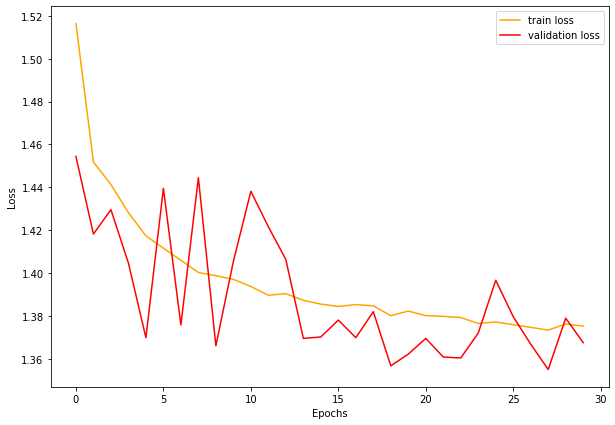

In [40]:
# plot and save the train and validation line graphs
plt.figure(figsize=(10, 7))
plt.plot(train_loss_1_aug, color='orange', label='train loss')
plt.plot(valid_loss_1_aug, color='red', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

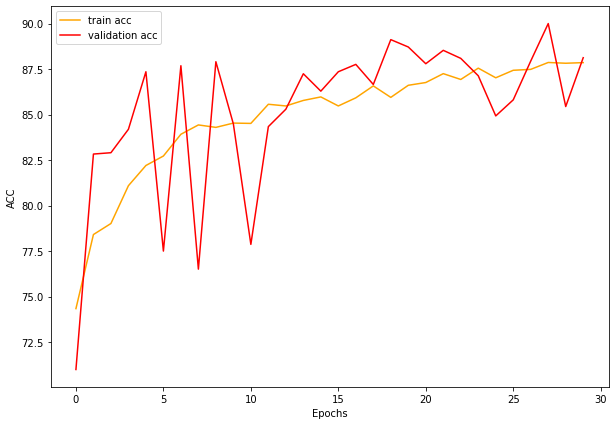

In [41]:
# plot and save the train and validation line graphs
plt.figure(figsize=(10, 7))
plt.plot(train_acc_1_aug, color='orange', label='train acc')
plt.plot(valid_acc_1_aug, color='red', label='validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()
plt.show()

### _Model 2_

In [42]:
# anomalies_to_include_2 = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# augments_to_include_2 = [0, 0, 0, 0]
# num_classes_2 = len(anomalies_to_include_2)

# model_2 = ResidualNet('ImageNet', 5, num_classes_2, 'CBAM')
# model_2.to(device) # sends model to GPU
# optimizer = optim.Adam(model_2.parameters(), lr=0.00003)

# train_dataset_2 = TeethDataLoader(train_path_to_df, anomalies_to_include_2, True, augments_to_include_2)
# valid_dataset_2 = TeethDataLoader(valid_path_to_df, anomalies_to_include_2, False, augments_to_include_2)

# # generate shuffled sequence of numbers based on how many images, split train/test
# train_idx_2 = np.array(range(len(train_dataset_2.labels)))
# shuffle(train_idx_2)
# valid_idx_2 = np.array(range(len(valid_dataset_2.labels)))
# shuffle(valid_idx_2)

# # Samples elements randomly from a given list of indices, without replacement
# train_sampler_2 = torch.utils.data.SubsetRandomSampler(train_idx_2)
# valid_sampler_2 = torch.utils.data.SubsetRandomSampler(valid_idx_2)

# # loads images associated with ids/samples from above
# train_loader_2 = torch.utils.data.DataLoader(train_dataset_2, batch_size=batch_size, sampler=train_sampler_2)
# valid_loader_2 = torch.utils.data.DataLoader(valid_dataset_2, batch_size=batch_size, sampler=valid_sampler_2)

In [43]:
# train_loss_2 = []
# valid_loss_2 = []
# train_acc_2 = []
# valid_acc_2 = []

# for epoch in range(1, epochs+1):
#     train_epoch_loss, train_epoch_accuracy = train(train_loader_2, model_2, num_classes_2, optimizer, epoch)
#     valid_epoch_loss, val_epoch_accuracy = valid(valid_loader_2, model_2, num_classes_2, epoch)
    
#     train_loss_2.append(train_epoch_loss)
#     valid_loss_2.append(valid_epoch_loss)
    
#     train_acc_2.append(train_epoch_accuracy)
#     valid_acc_2.append(val_epoch_accuracy)

In [44]:
# PATH = 'model_2.pth'
# torch.save(model_2.state_dict(), PATH)

In [45]:
# # plot and save the train and validation line graphs
# plt.figure(figsize=(10, 7))
# plt.plot(train_loss_2, color='orange', label='train loss')
# plt.plot(valid_loss_2, color='red', label='validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [46]:
# # plot and save the train and validation line graphs
# plt.figure(figsize=(10, 7))
# plt.plot(train_acc_2, color='orange', label='train acc')
# plt.plot(valid_acc_2, color='red', label='validation acc')
# plt.xlabel('Epochs')
# plt.ylabel('ACC')
# plt.legend()
# plt.show()

### _Model 2 with Augments_

In [47]:
# anomalies_to_include_2_aug = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# augments_to_include_2_aug = [1, 1, 1, 1]

# num_classes_2_aug = len(anomalies_to_include_2_aug)

# model_2_aug = ResidualNet('ImageNet', 5, num_classes_2_aug, 'CBAM')
# model_2_aug.to(device) # sends model to GPU
# optimizer = optim.Adam(model_2_aug.parameters(), lr=0.00003)

# train_dataset_2_aug = TeethDataLoader(train_path_to_df, anomalies_to_include_2_aug, True, augments_to_include_2_aug)
# valid_dataset_2_aug = TeethDataLoader(valid_path_to_df, anomalies_to_include_2_aug, False, augments_to_include_2_aug)

# # generate shuffled sequence of numbers based on how many images, split train/test
# train_idx_2_aug = np.array(range(len(train_dataset_2_aug.labels)))
# shuffle(train_idx_2_aug)
# valid_idx_2_aug = np.array(range(len(valid_dataset_2_aug.labels)))
# shuffle(valid_idx_2_aug)

# # Samples elements randomly from a given list of indices, without replacement
# train_sampler_2_aug = torch.utils.data.SubsetRandomSampler(train_idx_2_aug)
# valid_sampler_2_aug = torch.utils.data.SubsetRandomSampler(valid_idx_2_aug)

# # loads images associated with ids/samples from above
# train_loader_2_aug = torch.utils.data.DataLoader(train_dataset_2_aug, batch_size=batch_size, sampler=train_sampler_2_aug)
# valid_loader_2_aug = torch.utils.data.DataLoader(valid_dataset_2_aug, batch_size=batch_size, sampler=valid_sampler_2_aug)

In [48]:
# train_loss_2_aug = []
# valid_loss_2_aug = []
# train_acc_2_aug = []
# valid_acc_2_aug = []

# for epoch in range(1, epochs+1):
#     train_epoch_loss, train_epoch_accuracy = train(train_loader_2_aug, model_2_aug, num_classes_2_aug, optimizer, epoch)
#     valid_epoch_loss, val_epoch_accuracy = valid(valid_loader_2_aug, model_2_aug, num_classes_2_aug, epoch)
    
#     train_loss_2_aug.append(train_epoch_loss)
#     valid_loss_2_aug.append(valid_epoch_loss)
    
#     train_acc_2_aug.append(train_epoch_accuracy)
#     valid_acc_2_aug.append(val_epoch_accuracy)

In [49]:
# PATH = 'model_2_aug.pth'
# torch.save(model_2_aug.state_dict(), PATH)

In [50]:
# # plot and save the train and validation line graphs
# plt.figure(figsize=(10, 7))
# plt.plot(train_loss_2_aug, color='orange', label='train loss')
# plt.plot(valid_loss_2_aug, color='red', label='validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [51]:
# # plot and save the train and validation line graphs
# plt.figure(figsize=(10, 7))
# plt.plot(train_acc_2_aug, color='orange', label='train acc')
# plt.plot(valid_acc_2_aug, color='red', label='validation acc')
# plt.xlabel('Epochs')
# plt.ylabel('ACC')
# plt.legend()
# plt.show()

# Look at Train and Validation Images

In [52]:
def display_images(df, anomaly_code, num_images=5):
    """
    Function displays validation using the file paths from a dataframe (so use the train_df or valid_df)
    Inputs:
        df: the df to get the file paths from
        anomaly_code: a list of the anomaly codes you want to display
        num_images: the number of images per anomaly code you want to show.  If 0, then display all.
    """
    for code in anomaly_code:        
        anomaly_filter = df['anomaly_codes'] == code
        temp_df = df[anomaly_filter]
        file_paths = sample(temp_df['file_path'].tolist(), num_images)
        
        for file in file_paths:
            img = plt.imread(file)
            plt.figure()
            plt.title(f'anomaly{code}')
            plt.imshow(img)  

In [53]:
display_anomalies = [0, 1, 2, 3, 4, 5, 6, 7, 8]

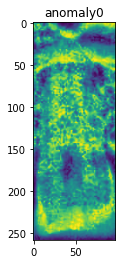

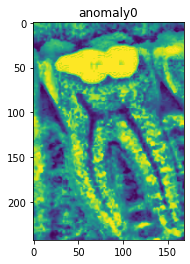

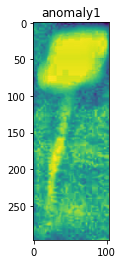

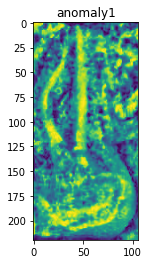

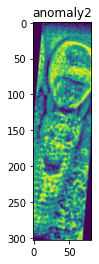

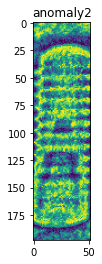

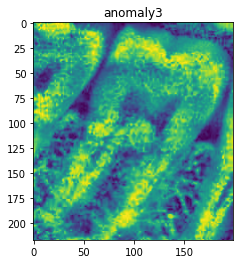

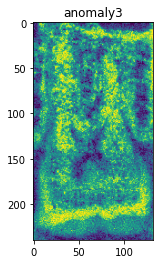

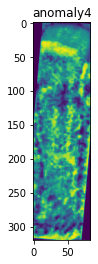

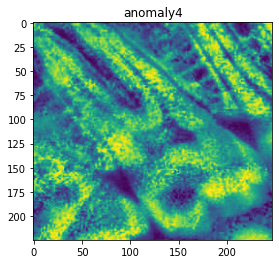

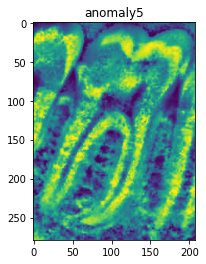

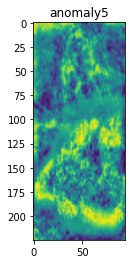

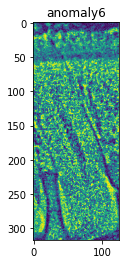

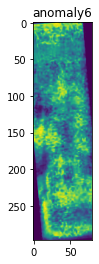

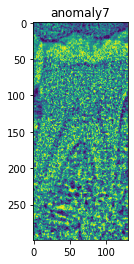

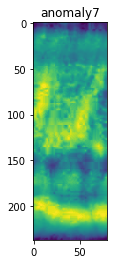

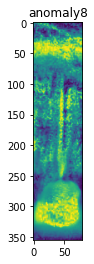

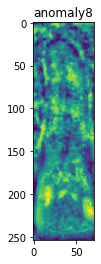

In [54]:
display_images(filter_rotation(train_aug_df, [[0,20], [160, 200], [340, 360]]), display_anomalies, num_images=2)

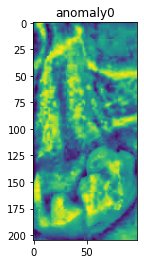

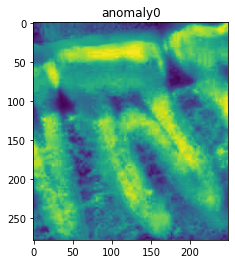

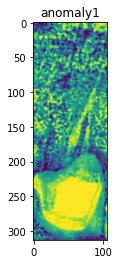

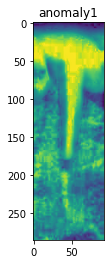

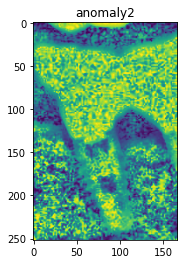

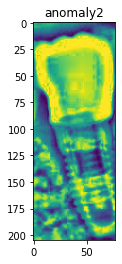

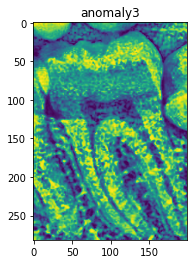

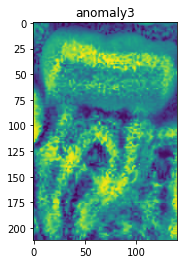

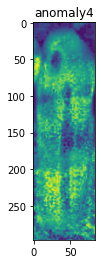

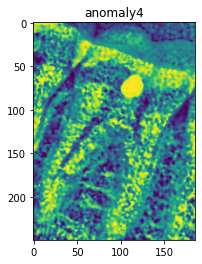

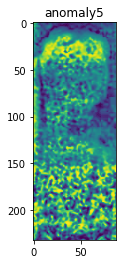

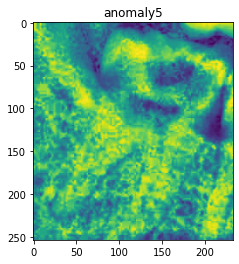

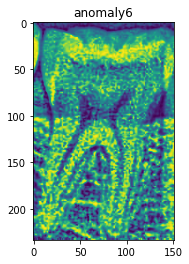

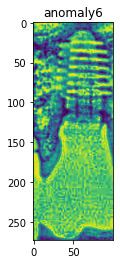

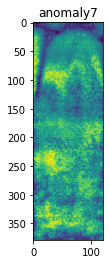

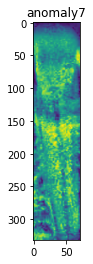

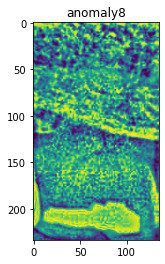

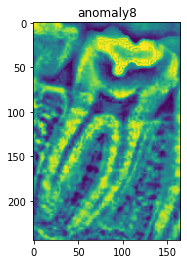

In [55]:
display_images(valid_df, display_anomalies, num_images=2)

# Look at Model Architecture

In [56]:
# os.environ["PATH"] += os.pathsep + 'C:\programdata\anaconda3\envs\dental_project_av\lib\site-packages\graphviz'
# os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'
# os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin\dot.exe'

In [57]:
# !ls C:\programdata\anaconda3\envs\dental_project_av\lib\site-packages\graphviz

In [58]:
# print(os.environ["PATH"])

In [59]:
# batch = next(iter(train_loader_1))[0]
# batch = batch.to(device)

In [60]:
# yhat = model_1(batch)

In [61]:
# make_dot(yhat, params=dict(list(model_1.named_parameters()))).render("rnn_torchviz", format="png")

In [62]:
# x = torch.randn(64, 3, 224, 224)
# x = x.to(device)
# y = model_1(x)

In [63]:
# make_dot(y.mean(), params=dict(model_1.named_parameters()))

In [64]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model_1 = model_1.to(device)

NameError: name 'model_1' is not defined

In [ ]:
summary(model_1, input_size=(3, 224, 224), batch_size=64)